In [2]:
import pandas as pd
import numpy as np

**Read data**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Project.zip (Unzipped Files)/LaundryData.csv")

In [5]:
df.head()

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles
0,1,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no
2,3,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no
3,4,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no
4,5,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             807 non-null    int64  
 1   Date           807 non-null    object 
 2   Time           807 non-null    object 
 3   Race           797 non-null    object 
 4   Gender         793 non-null    object 
 5   Body_Size      790 non-null    object 
 6   Age_Range      799 non-null    float64
 7   With_Kids      794 non-null    object 
 8   Kids_Category  777 non-null    object 
 9   Basket_Size    801 non-null    object 
 10  Basket_colour  798 non-null    object 
 11  Attire         776 non-null    object 
 12  Shirt_Colour   798 non-null    object 
 13  shirt_type     770 non-null    object 
 14  Pants_Colour   802 non-null    object 
 15  pants_type     798 non-null    object 
 16  Wash_Item      784 non-null    object 
 17  Washer_No      807 non-null    int64  
 18  Dryer_No  

**Missing data**

In [8]:
print(df.isnull().sum()) 

No                0
Date              0
Time              0
Race             10
Gender           14
Body_Size        17
Age_Range         8
With_Kids        13
Kids_Category    30
Basket_Size       6
Basket_colour     9
Attire           31
Shirt_Colour      9
shirt_type       37
Pants_Colour      5
pants_type        9
Wash_Item        23
Washer_No         0
Dryer_No          0
Spectacles        0
dtype: int64


In [9]:
print(df.isnull().sum().sum())

221


**Measuring Central Tendency (Mean, median, mode)**



In [37]:
df.describe()

,No,Age_Range,Washer_No,Dryer_No
count,807.000000,799.000000,807.000000,807.000000
mean,404.000000,42.182728,4.465923,8.418835
std,233.105126,7.981756,1.152628,1.142694
min,1.000000,28.000000,3.000000,7.000000
25%,202.500000,36.000000,3.000000,7.000000
50%,404.000000,42.000000,4.000000,8.000000
75%,605.500000,49.000000,6.000000,9.000000
max,807.000000,55.000000,6.000000,10.000000


In [49]:
print("Mean: ", df.mean())
print("Median: ", df.median())
print("Mode: ", df.mode())

Mean:  No           404.000000
Age_Range     42.182728
Washer_No      4.465923
Dryer_No       8.418835
dtype: float64
Median:  No           404.0
Age_Range     42.0
Washer_No      4.0
Dryer_No       8.0
dtype: float64
Mode:        No        Date     Time    Race  ... Wash_Item Washer_No  Dryer_No Spectacles
0      1  29/11/2015  4:03:48  indian  ...   clothes       3.0       7.0         no
1      2         NaN      NaN     NaN  ...       NaN       NaN       NaN        NaN
2      3         NaN      NaN     NaN  ...       NaN       NaN       NaN        NaN
3      4         NaN      NaN     NaN  ...       NaN       NaN       NaN        NaN
4      5         NaN      NaN     NaN  ...       NaN       NaN       NaN        NaN
..   ...         ...      ...     ...  ...       ...       ...       ...        ...
802  803         NaN      NaN     NaN  ...       NaN       NaN       NaN        NaN
803  804         NaN      NaN     NaN  ...       NaN       NaN       NaN        NaN
804  805         Na

**Visualizing distribution of data**

In [34]:
def plt_cat(data, var):
    %matplotlib inline
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(font_scale=1.4)
    data[var].value_counts().plot(kind='bar', figsize=(5, 4), rot=0)
    print(data[var].value_counts())
    print('Missing Value Count: ', data[var].isnull().sum())
    miss = data[var].isnull().sum() / len(data)
    print('Missing Value Percentage: ', "{:.2%}".format(miss))

indian        242
malay         235
chinese       232
foreigner      88
Name: Race, dtype: int64
Missing Value Count:  10
Missing Value Percentage:  1.24%


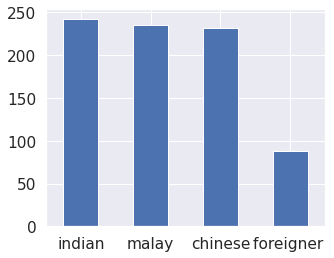

In [35]:
plt_cat(df, 'Race')

female    400
male      393
Name: Gender, dtype: int64
Missing Value Count:  14
Missing Value Percentage:  1.73%


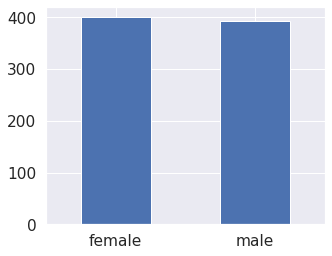

In [36]:
plt_cat(df, 'Gender')

fat         274
moderate    265
thin        251
Name: Body_Size, dtype: int64
Missing Value Count:  17
Missing Value Percentage:  2.11%


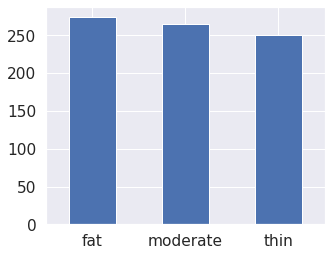

In [50]:
plt_cat(df, 'Body_Size')

3    228
6    207
5    190
4    182
Name: Washer_No, dtype: int64
Missing Value Count:  0
Missing Value Percentage:  0.00%


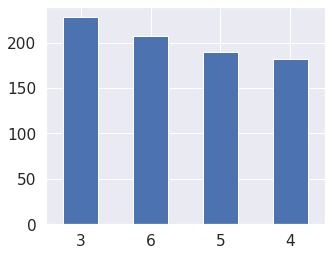

In [52]:
plt_cat(df, 'Washer_No')

7     233
8     198
10    195
9     181
Name: Dryer_No, dtype: int64
Missing Value Count:  0
Missing Value Percentage:  0.00%


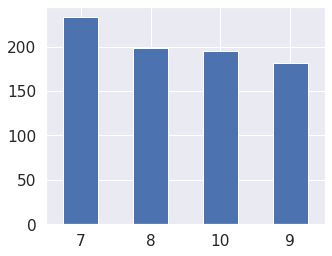

In [53]:
plt_cat(df, 'Dryer_No')

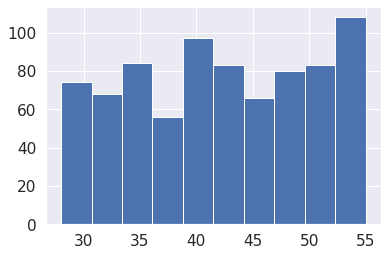

In [63]:
df['Age_Range'].hist()

**Feature Selection**

In [105]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [120]:
df = pd.read_csv("/content/gdrive/MyDrive/Project.zip (Unzipped Files)/LaundryData.csv").fillna('99')
df['Kids_Category'] = df['Kids_Category'].str.strip()
df['Pants_Colour'] = df['Pants_Colour'].str.strip()
df = df.drop(columns=['No', 'Age_Range', 'Date', 'Time'])

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Race           807 non-null    object
 1   Gender         807 non-null    object
 2   Body_Size      807 non-null    object
 3   With_Kids      807 non-null    object
 4   Kids_Category  807 non-null    object
 5   Basket_Size    807 non-null    object
 6   Basket_colour  807 non-null    object
 7   Attire         807 non-null    object
 8   Shirt_Colour   807 non-null    object
 9   shirt_type     807 non-null    object
 10  Pants_Colour   807 non-null    object
 11  pants_type     807 non-null    object
 12  Wash_Item      807 non-null    object
 13  Washer_No      807 non-null    int64 
 14  Dryer_No       807 non-null    int64 
 15  Spectacles     807 non-null    object
dtypes: int64(2), object(14)
memory usage: 101.0+ KB


In [122]:
X = df.drop(columns=['Washer_No', 'Dryer_No'])
y1 = df['Washer_No']
y2 = df['Dryer_No']

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (564, 14) (564,)
Test (243, 14) (243,)


In [124]:
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [125]:
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [126]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [127]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [128]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Feature Race: 0.793086
Feature Gender: 0.763357
Feature Body_Size: 3.750264
Feature With_Kids: 0.357594
Feature Kids_Category: 3.636999
Feature Basket_Size: 1.729114
Feature Basket_colour: 15.019389
Feature Attire: 3.481818
Feature Shirt_Colour: 2.454884
Feature shirt_type: 0.099401
Feature Pants_Colour: 54.431802
Feature pants_type: 1.774977
Feature Wash_Item: 1.020750
Feature Spectacles: 5.032126


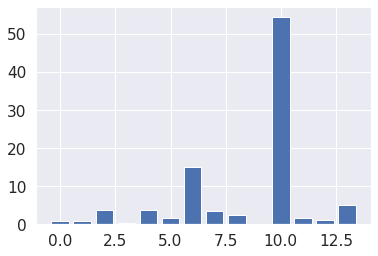

In [132]:
 for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (X.columns[i], fs.scores_[i]))
    
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

**Machine Learning Techniques**

Using category input and category output

https://machinelearningmastery.com/feature-selection-with-categorical-data/